# Logistic Regression on Uber and Lyft 2018 Dataset Boston, MA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 1️. Load and Inspect the Datasets (Raw and Cleaned)

In [3]:
# Load raw data
df = pd.read_csv('/content/drive/MyDrive/DS160/Final Project/Myhre_Chris_Dataset_Raw.csv')
df.head()



,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


The raw dataset had 57 columns while the cleaned dataset has 28 columns. 29 columns were removed in excel due to their redundancy.

In [43]:
# Load cleaned data
df = pd.read_csv('/content/drive/MyDrive/DS160/Final Project/Myhre_Chris_Dataset_Clean.csv')
df.head()



,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,43.68,34.19,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,47.30,42.10,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,47.55,33.10,31.10,992.28,240,0.03,0,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,45.03,28.90,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,42.18,36.71,28.61,998.36,303,0.44,0,347.7,0.72,0.0001


## 2️. Data Overview and Missing Values

In [44]:

df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                693071 non-null  int64  
 1   day                 693071 non-null  int64  
 2   month               693071 non-null  int64  
 3   source              693071 non-null  object 
 4   destination         693071 non-null  object 
 5   cab_type            693071 non-null  object 
 6   name                693071 non-null  object 
 7   price               637976 non-null  float64
 8   distance            693071 non-null  float64
 9   surge_multiplier    693071 non-null  float64
 10  temperature         693071 non-null  float64
 11  weather             693071 non-null  object 
 12  precipIntensity     693071 non-null  float64
 13  precipProbability   693071 non-null  float64
 14  humidity            693071 non-null  float64
 15  windSpeed           693071 non-nul

,0
hour,0
day,0
month,0
source,0
destination,0
cab_type,0
name,0
price,55095
distance,0
surge_multiplier,0


In [45]:
# Drop missing price columns (55095/693071 = 8% of data dropped)
df=df.dropna()
df.isna().sum()

,0
hour,0
day,0
month,0
source,0
destination,0
cab_type,0
name,0
price,0
distance,0
surge_multiplier,0


## 3️. Exploratory Data Analysis (EDA)

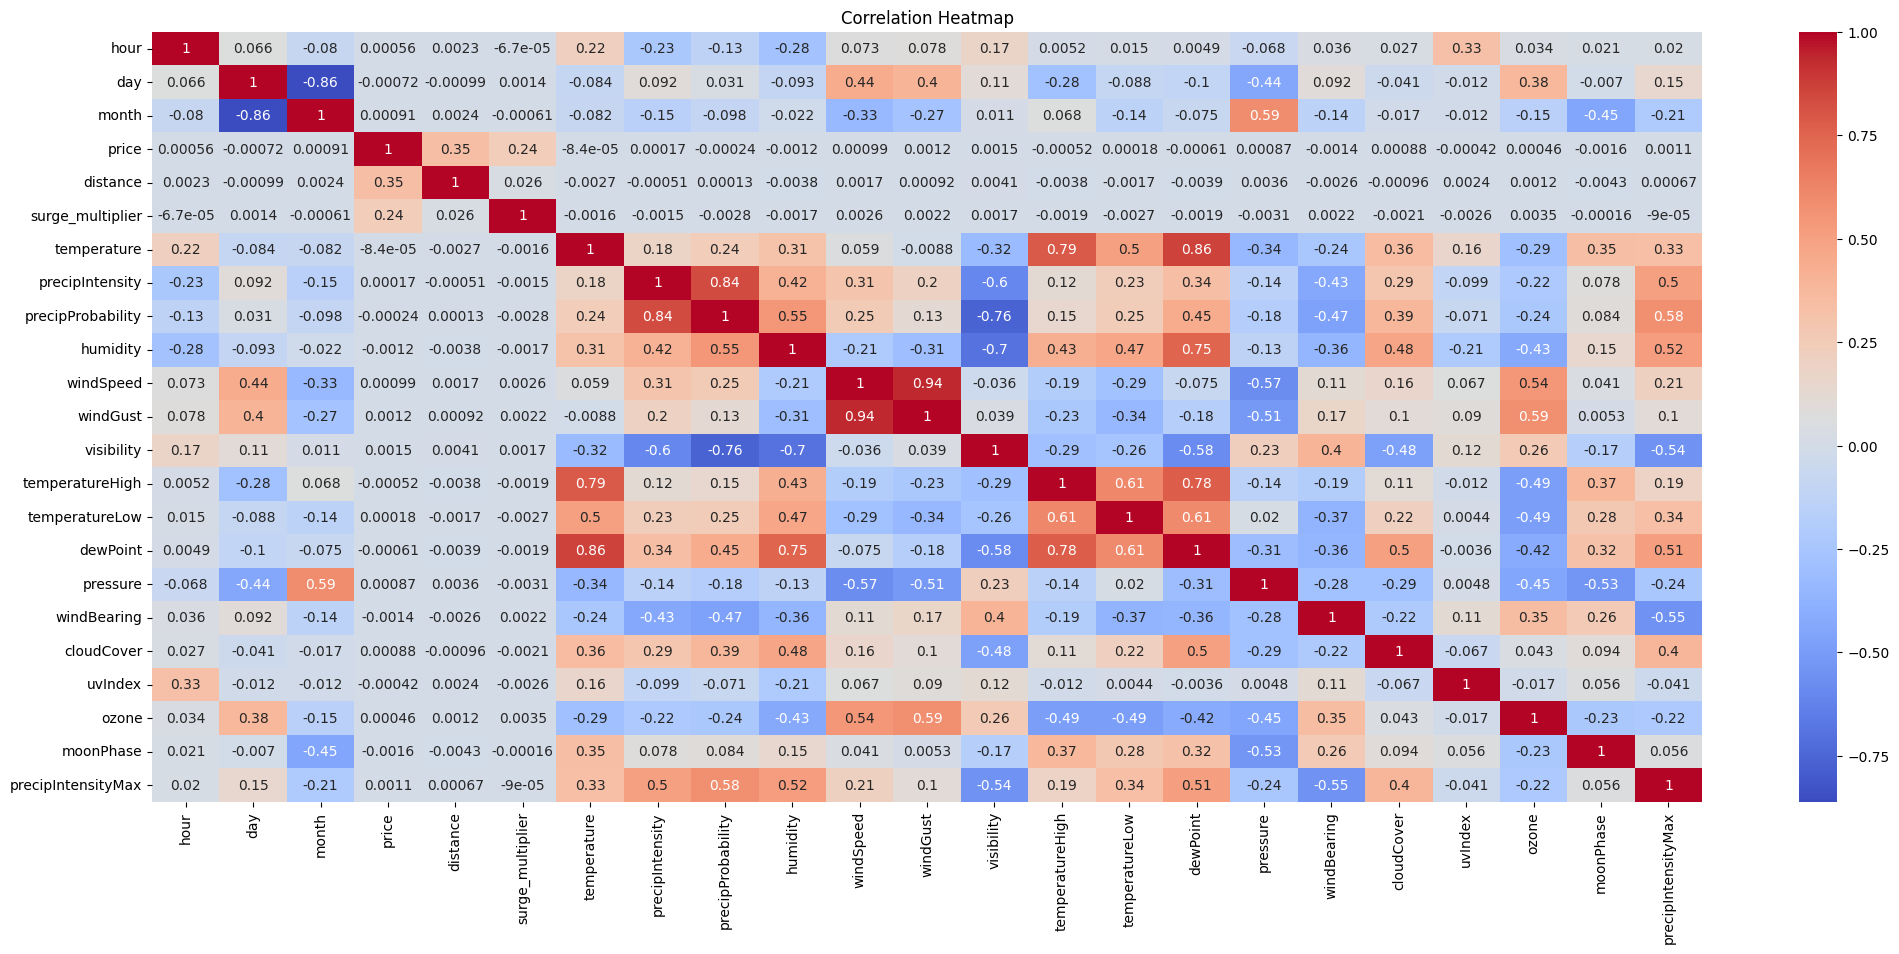

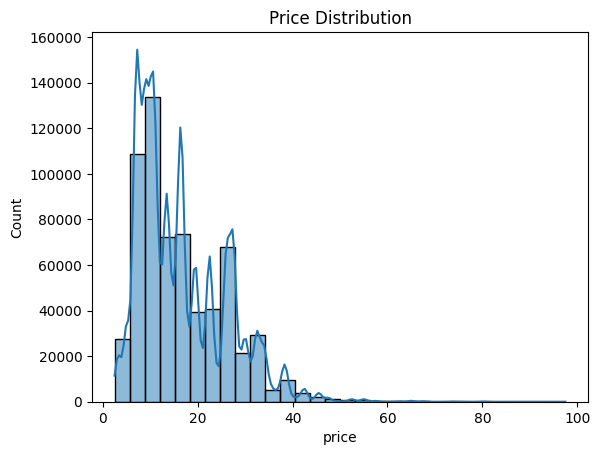

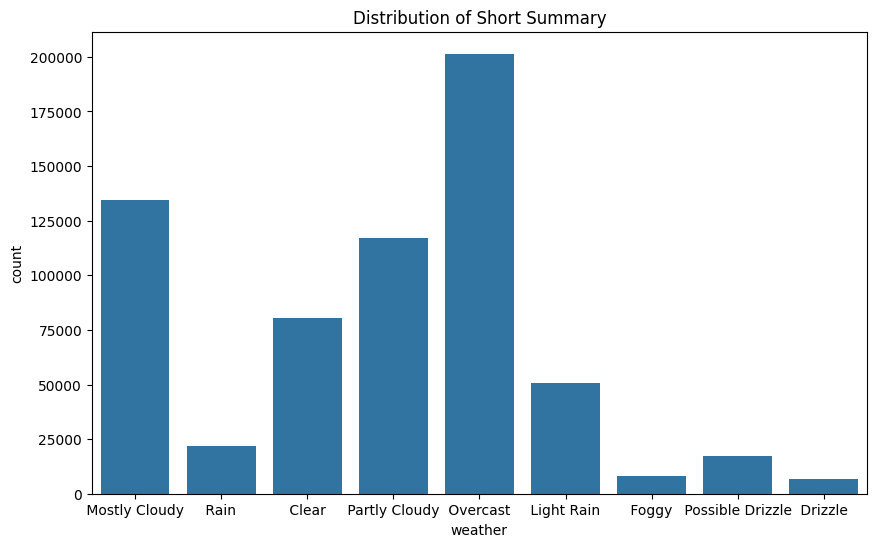

In [7]:
# Correlation Heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Example distribution
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='weather', data=df)
plt.title('Distribution of Short Summary')
plt.show()

Heatmap Insights: Some notable correlations are dewPoint + humidity (0.75), temp + dewPoint (0.86), PrecipProbability + visibility (-0.76), but surprsingly no correlations between price and weather.

Histogram: Price seems to be concentrated around 10 dollars, few rides above 35 dollars.

Countplot: Most rides were ordered with overcast weather and second most rides ordered with mostly cloudy weather and third most rides ordered with partly cloudy weather. Contrary to what I thought, only a minority of rides were ordered during rainy weather.

In [47]:
df['weather'].value_counts()

,count
weather,
Overcast,201429
Mostly Cloudy,134603
Partly Cloudy,117226
Clear,80256
Light Rain,50488
Rain,21781
Possible Drizzle,17176
Foggy,8292
Drizzle,6725


Adding another price category to convert numerical values into categorical (High/Low).

In [9]:
median_price = df['price'].median()
df['price_cat'] = df['price'].apply(lambda x: 'High' if x > median_price else 'Low')
df['price_cat'].value_counts()

,count
price_cat,
Low,321544
High,316432


Converting categorical columns into numerical

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
df.sample()

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,...,name_WAV,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain,price_cat_Low
481103,18,28,11,17.5,3.21,1.0,40.92,0.0,0.0,0.64,...,False,False,False,False,False,True,False,False,False,False


In [12]:
df.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'temperature', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'dewPoint', 'pressure', 'windBearing', 'cloudCover',
       'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax',
       'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'desti

### Model Elements Key
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66)
1. hour
2. day
3. month
4. price
5. distance
6. surge_multiplier
7. temperature
8. precipIntensity
9. precipProbability
10. humidity
11. windSpeed
12. windGust
13. visibility
14. temperatureHigh
15. temperatureLow
16. dewPoint
17. pressure
18. windBearing
19. cloudCover
20. uvIndex
21. ozone
22. moonPhase
23. precipIntensityMax
24. source_Beacon Hill
25. source_Boston University
26. source_Fenway
27. source_Financial District
28. source_Haymarket Square
29. source_North End
30. source_North Station
31. source_Northeastern University
32. source_South Station
33. source_Theatre District
34. source_West End
35. destination_Beacon Hill
36. destination_Boston University
37. destination_Fenway
38. destination_Financial District
39. destination_Haymarket Square
40. destination_North End
41. destination_North Station
42. destination_Northeastern University
43. destination_South Station
44. destination_Theatre District
45. destination_West End
46. cab_type_Uber
47. name_Black SUV
48. name_Lux
49. name_Lux Black
50. name_Lux Black XL
51. name_Lyft
52. name_Lyft XL
53. name_Shared
54. name_UberPool
55. name_UberX
56. name_UberXL
57. name_WAV
58. weather_ Drizzle
59. weather_ Foggy
60. weather_ Light Rain
61. weather_ Mostly Cloudy
62. weather_ Overcast
63. weather_ Partly Cloudy
64. weather_ Possible Drizzle
65. weather_ Rain

## 4️. Handle Missing Values

For missing values I dropped the 8% of rows that had missing price values, there were no other missing values in the other columns.

## 5. Train-Test Split

In [13]:
df.sample()

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,...,name_WAV,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain,price_cat_Low
62772,10,15,12,5.0,1.23,1.0,46.59,0.0,0.0,0.88,...,False,False,False,False,False,True,False,False,False,True


In [14]:
X = df.drop(['price_cat_Low','price'], axis = 1)
y = df['price_cat_Low']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Train Logistic Regression Model

In [16]:

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 7. Model Evaluation

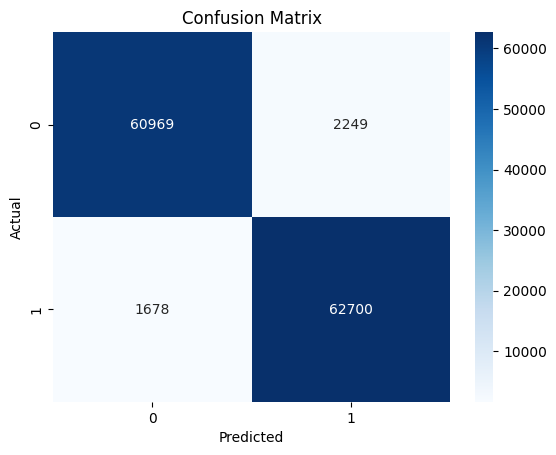

In [17]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In the confusion matrix, thee were 60,969 true negatives, 1,678 false negatives, 62,700 true positives and 2,249 false positives. The positives are low ride costs while the negatives are high ride costs.

This matrix reports a model accuracy of 96.92% (123,669 / 127,596)

In [18]:
# Report
print(classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

              precision    recall  f1-score   support

       False       0.97      0.96      0.97     63218
        True       0.97      0.97      0.97     64378

    accuracy                           0.97    127596
   macro avg       0.97      0.97      0.97    127596
weighted avg       0.97      0.97      0.97    127596

Accuracy: 0.969


As for the classification report, it states what the confusion matrix had depicted. A overall near perfect model accuracy was accomplished in predicting whether the price of a ride from an Uber or Lyft in Bostom, MA would be Low or not.

## -----------------------------------------------------------------

Applying SMOTE due to imbalanced weather.value_counts()

In [19]:
# Apply smote
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [30]:
y.value_counts()

,count
price_cat_Low,
True,321544
False,316432


In [21]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

In [32]:
# After SMOTE
y_smote.value_counts()

,count
price_cat_Low,
True,321544
False,321544


In [23]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643088 entries, 0 to 643087
Data columns (total 64 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   hour                                 643088 non-null  int64  
 1   day                                  643088 non-null  int64  
 2   month                                643088 non-null  int64  
 3   distance                             643088 non-null  float64
 4   surge_multiplier                     643088 non-null  float64
 5   temperature                          643088 non-null  float64
 6   precipIntensity                      643088 non-null  float64
 7   precipProbability                    643088 non-null  float64
 8   humidity                             643088 non-null  float64
 9   windSpeed                            643088 non-null  float64
 10  windGust                             643088 non-null  float64
 11  visibility   

In [25]:
## 4. Train-Test Split
X = df.drop(['price_cat_Low','price'], axis = 1)
y = df['price_cat_Low']
x_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [27]:


## 6. Train Logistic Regression Model

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


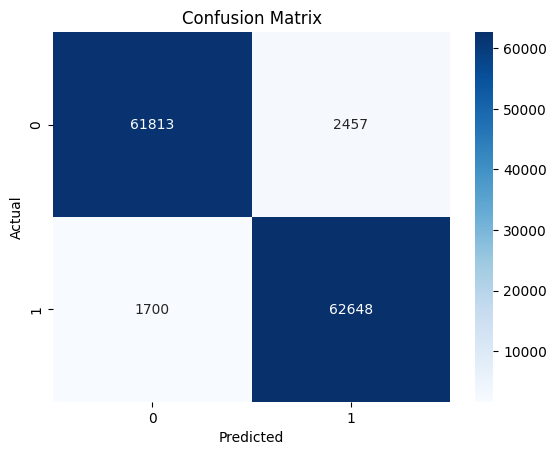

In [28]:
## 7. Model Evaluation
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.97      0.96      0.97     64270
        True       0.96      0.97      0.97     64348

    accuracy                           0.97    128618
   macro avg       0.97      0.97      0.97    128618
weighted avg       0.97      0.97      0.97    128618



Same accuracy as done before without SMOTE.

Example: Predict whether the cost of a uber/lyft ride is high or low

Situation: Predict the cost of a Lyft on October 7th, at 9 am with a distance of 1.76 miles from North Station to South Station and a surge multiplier of 1.5. It is 60 F outside with rain, precipitation intensity of 0.125, precipitation probability of 1, humidity of 92%, wind speed of 10 mph, wind gust of 15 mph, visibility of 5 miles, a max temp of 70 F, low temp of 55 F, dew point of 57 F, pressure is 1000, wind bearing of 95, cloud cover of 100%, uv index 0, ozone of 285, moon phase of 0.7, and max precipitation of 0.15.

### Model prediction parameters

Time & Charge: Hour, day, month, distance, surge multiplier:

[9, 7, 10, 1.76, 1.5]

Weather Details: temp, precipIntensity, precipProbability, humidity, windSpeed, windGust, visibility, tempHigh, tempLow, dewPoint, pressure, windBearing, cloudCover, uvIndex, ozone, moonPhase, precipIntensityMax

[60, 0.125, 1, 0.92, 10, 15, 5, 70, 55, 57, 1000, 95, 1, 0, 285, 0.7, 0.15]

Staring Location: source_Beacon Hill, source_Boston University, source_Fenway, source_Financial District, source_Haymarket Square, source_North End, source_North Station, source_Northeastern University, source_South Station, source_Theatre District, source_West End

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

Destination Location: destination_Beacon Hill, destination_Boston University, destination, destination_Financial District, destination_Haymarket Square, destination_North End, destination_North Station, destination_Northeastern University, destination_South Station, destination_Theatre District, destination_West End

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

Uber or Lyft and Vehicle Type: cab_type_Uber, name_Black SUV, name_Lux, name_Lux Black, name_Lux Black XL, name_Lyft, name_Lyft XL, name_Shared, name_UberPool, name_UberX, name_UberXL, name_WAV

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Weather Type: weather_ Drizzle, weather_ Foggy, weather_ Light Rain, weather_ Mostly Cloudy, weather_ Overcast, weather_ Partly Cloudy, weather_ Possible Drizzle, weather_ Rain


[0, 0, 0, 0, 0, 0, 0, 1]

In [41]:
situation = [[9, 7, 10, 1.76, 1.5, 60, 0.125, 1, 0.92, 10, 15, 5, 70, 55, 57, 1000, 95, 1, 0, 285, 0.7, 0.15, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
result = model.predict(situation)
print("The predicted ride cost is Low: ", result[0])

The predicted ride cost is Low:  True


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Overall, the model did very well predicting whether a ride cost in Boston, MA would be Low or not, achieving a 96.92% accuracy. It is surprising to learn that the weather doesn't influence the sales of Uber/Lyft rides. Only a minority of rides were ordered with rainy weather (the opposite was expected). My main finding is that weather doesn't imapct ride sales.